In [1]:
# import packages
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
pwd

'C:\\Users\\CITS\\Downloads'

In [ ]:
#IMDB (Internet Movie Database) is an online database of information related to films,television programs, home videos 
#and video games, and internet streams, including cast, production crew and personnel biographies and fan reviews and ratings.
#It contains data of 1000 most popular movies(by IMDB rating) for the period 1920-2020.
#It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic.

In [4]:
imdb=pd.read_csv('C:\\Users\\CITS\\Downloads\\imdb_top_1000.csv')

In [5]:
imdb.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"


In [6]:
imdb.tail(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
# neat up the data 

In [8]:
#  making a copy of the data to use
imdb = imdb.copy()

# Transform numerical values stored as text, "Released_Year", "Runtime", "Gross"

# 'Apollo 13' is ruining the code because it has 'PG' as its released year. I will fix 
#print(input_data.loc[input_data['Released_Year']=='PG', 'Series_Title'])
imdb.loc[imdb['Series_Title']=='Apollo 13', 'Released_Year'] = '1995'



In [ ]:
# "RunTime" has ' min' as uneccessary condition, and it could be numeric only
imdb['Runtime'].str.isdigit().sum() # Result is zero 
imdb['Runtime'] = imdb['Runtime'].str.extract('(\d+)', expand=False).astype('int')

# "Gross" has commas in it. I don't want 'em
imdb['Gross'] = imdb['Gross'].str.replace(',','').astype('float')

In [ ]:
#plot hist graph 

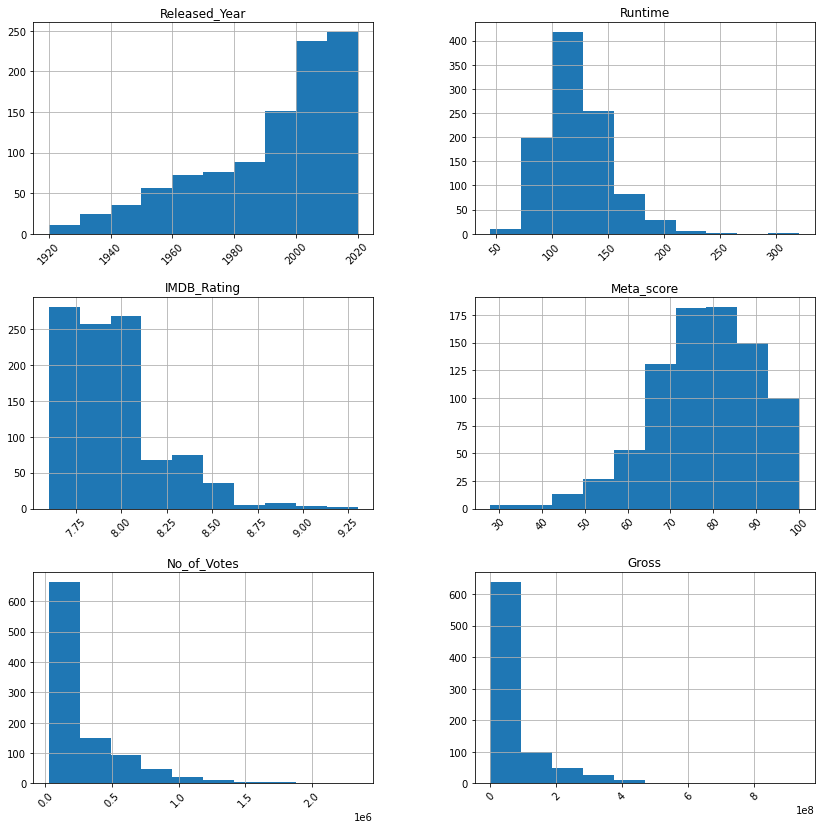

In [9]:
imdb.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
#find top voted series

In [12]:
top_voted = imdb.sort_values(['No_of_Votes'], ascending = False)

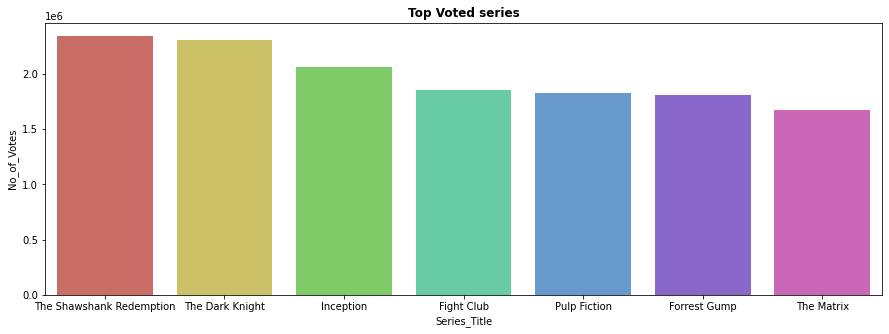

In [13]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted series", weight = "bold")
plt.show()

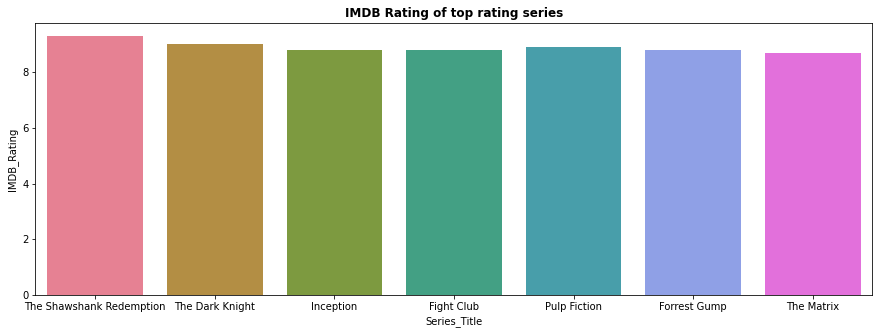

In [42]:
#top imdb rating series
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top rating series", weight = "bold")
plt.show()

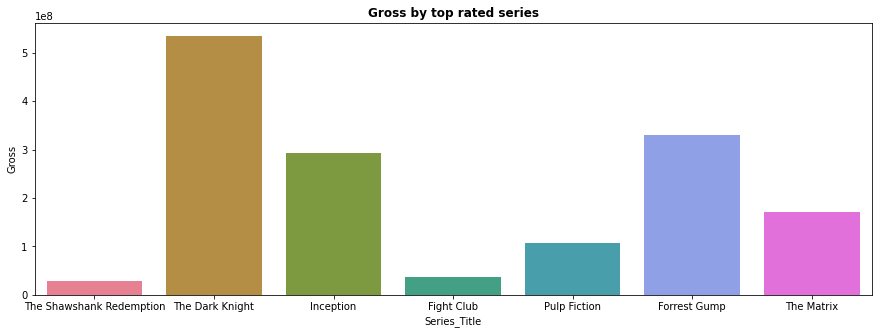

In [19]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated series", weight = "bold")
plt.show()

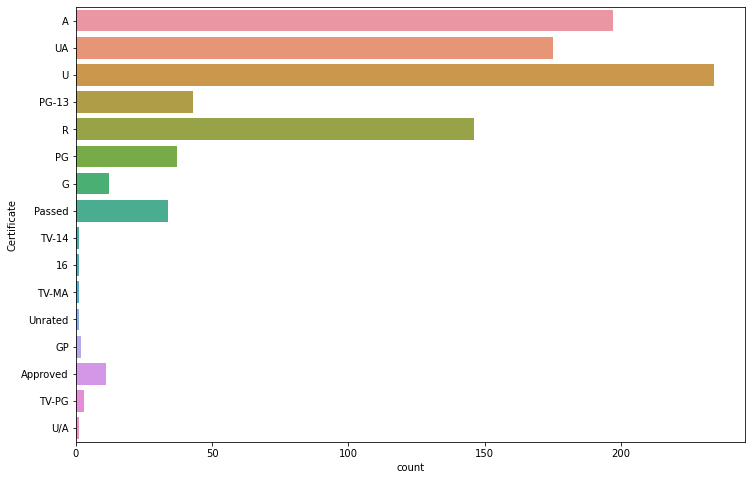

In [20]:
sns.countplot(y='Certificate', data=imdb)
plt.show()

In [17]:
imdb['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [ ]:
# when check the acctual count of certificate and  gragh is different because some values are 

In [21]:
# Calculate the number of movies directed by each director 
imdb.Director.value_counts().head(10)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: Director, dtype: int64

In [27]:
# Find out the top 5 directors by Gross
Gross_directors = imdb.groupby('Director').agg({'Gross': 'mean', 'No_of_Votes': 'count'})
top_5_revenue_directors = Gross_directors.rename(columns={'No_of_Votes': 'Series Count'}).sort_values('Gross', ascending=False)[:5]
top_5_revenue_directors

,Gross,Series Count
Director,,
Anthony Russo,5.512599e+08,4
Gareth Edwards,5.321773e+08,1
J.J. Abrams,4.743903e+08,3
Josh Cooley,4.340380e+08,1
Roger Allers,4.227838e+08,1


In [31]:
# Find out the top 5 directors by IMDB Rating
rating_directors = imdb.groupby('Director').agg({'IMDB_Rating': 'mean', 'No_of_Votes': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'No_of_Votes': 'Series Count'}).sort_values('IMDB_Rating', ascending=False)[:5]
top_5_rating_directors

,IMDB_Rating,Series Count
Director,,
Frank Darabont,8.95,2
Irvin Kershner,8.70,1
Lana Wachowski,8.70,1
George Lucas,8.60,1
Roberto Benigni,8.60,1


In [ ]:
# plot pie plot to check meta_score

<AxesSubplot:ylabel='Meta_score'>

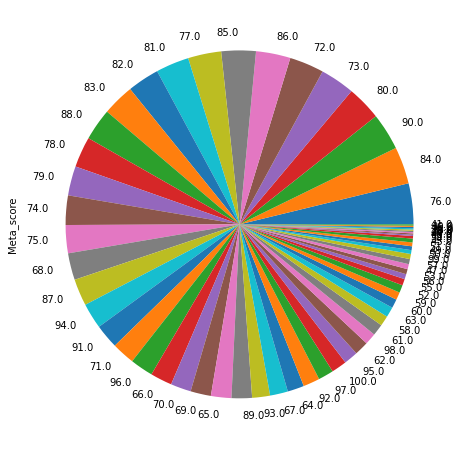

In [29]:
imdb.Meta_score.value_counts().plot(kind="pie",y=imdb['Runtime'].value_counts()[:10])

In [ ]:
#check genre top rated series

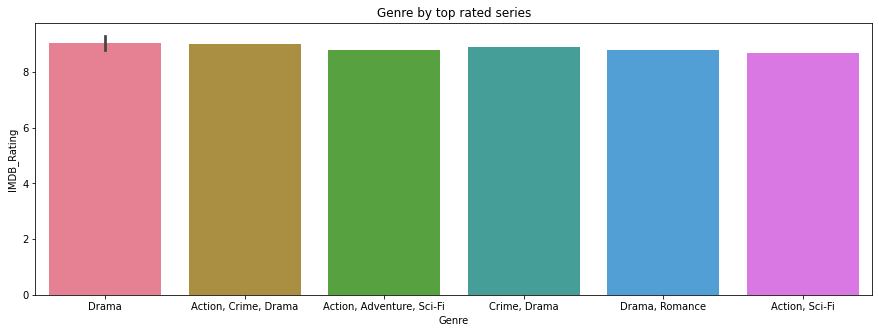

In [59]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Genre'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("Genre by top rated series")
plt.show()

In [33]:
# Calculate the number of genre top voteded 
imdb.Genre.value_counts().head(10)

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: Genre, dtype: int64

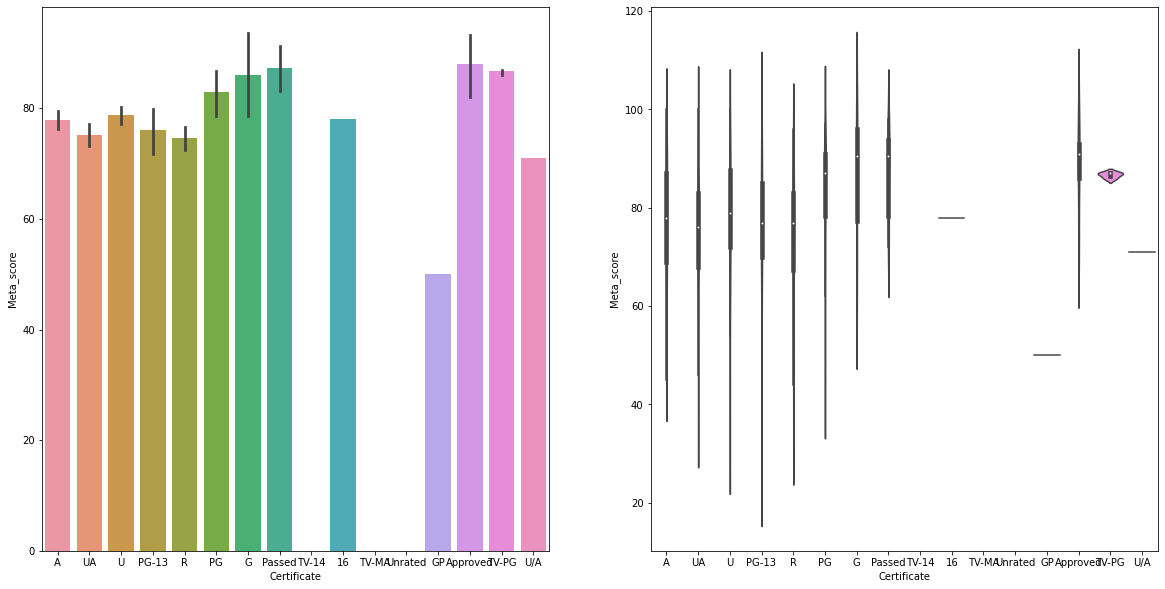

In [34]:
# comapair certificate and gross using barplot and violinplot

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x='Certificate', y='Meta_score',data=imdb)
plt.ylabel('Meta_score')
plt.subplot(1,2,2)
sns.violinplot(x='Certificate', y='Meta_score', data=imdb)
plt.ylabel('Meta_score')
plt.show()

In [ ]:
#using scatter plot check the metascore and certificate 

In [56]:
imdb['Certificate'] = imdb['Certificate'].fillna(imdb['Certificate'].mode()[0])
imdb['Meta_score'] = imdb['Meta_score'].fillna(imdb['Meta_score'].median())
imdb['Gross'] = imdb['Gross'].fillna(imdb['Gross'].mode()[0])

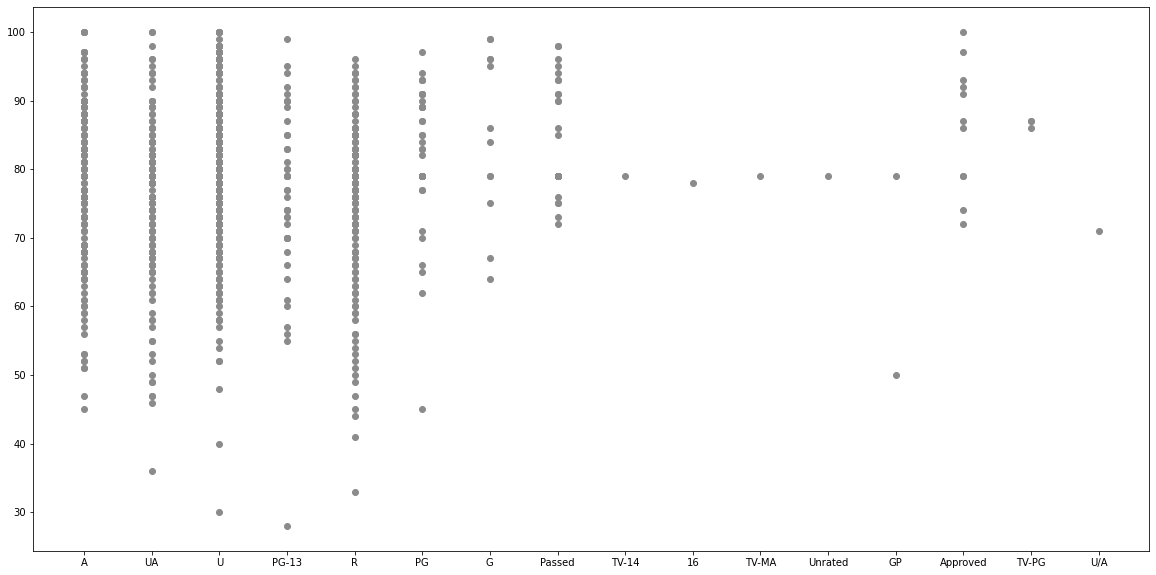

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(imdb['Certificate'], imdb['Meta_score'],color='#8b8b8b')
plt.show()

In [58]:
data1_imdb=imdb.Meta_score
plt.boxplot(data1_box)

NameError: name 'data1_box' is not defined

In [ ]:
#check the number of series incresing yearly

In [43]:
series_year = imdb.groupby('Released_Year')['No_of_Votes'].count()

Text(0, 0.5, 'series Count')

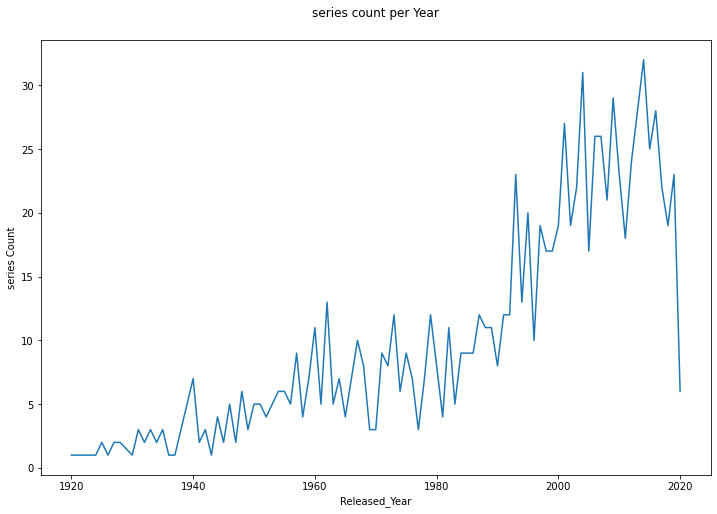

In [54]:
# Plot the series count per year
ax = series_year.plot.line();
ax.set_title('series count per Year', y=1.04)
ax.set_ylabel('series Count')

In [ ]:
#check gross

In [46]:
series_gross = imdb.groupby('Released_Year')['Gross'].sum()

In [47]:
series_gross.head(5)

Released_Year
1920          0.0
1921    5450000.0
1922          0.0
1924     977375.0
1925    5500970.0
Name: Gross, dtype: float64

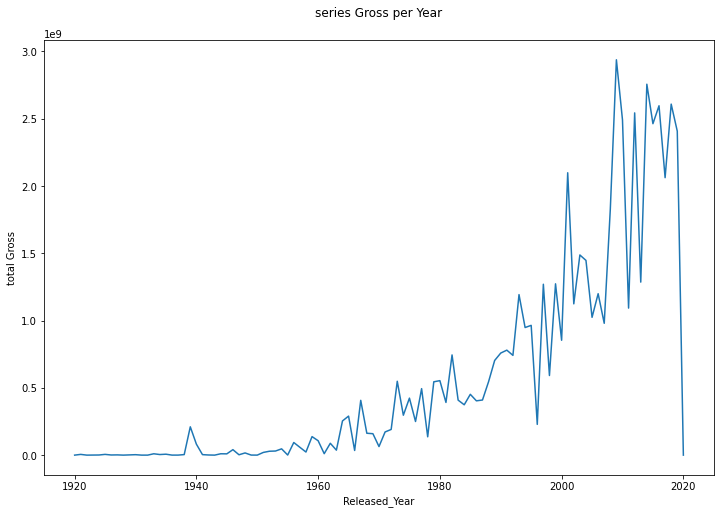

In [50]:
# Plot the gross for each year
ax = series_gross.plot.line();
ax.set_title('series Gross per Year', y=1.04)
ax.set_ylabel('total Gross');

In [39]:
# is popularity of series increasing yearly
Series_rating = imdb.groupby('Released_Year')['IMDB_Rating'].mean()
Series_rating.head(5)

Released_Year
1920    8.1
1921    8.3
1922    7.9
1924    8.2
1925    8.1
Name: IMDB_Rating, dtype: float64

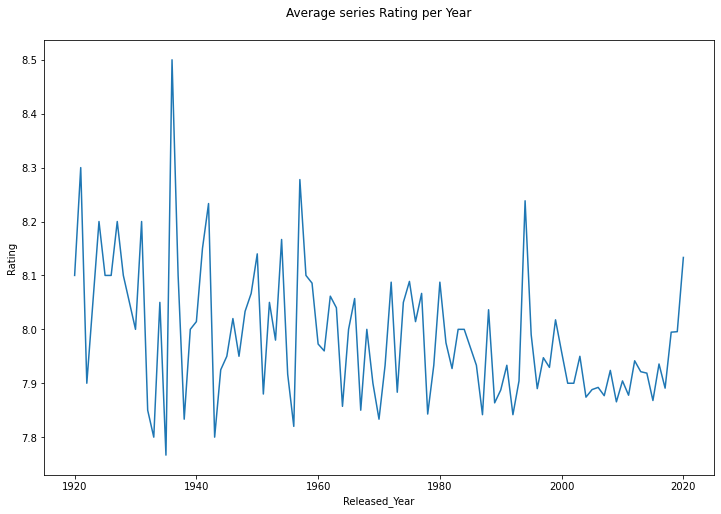

In [40]:
ax = Series_rating.plot.line();
ax.set_title('Average series Rating per Year', y=1.04)
ax.set_ylabel('Rating');

In [ ]:
# relationship gross, rating and metascore

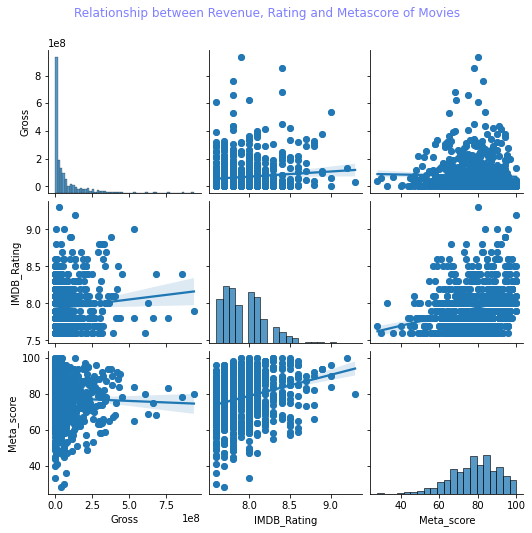

In [41]:
a=sns.pairplot(imdb, palette="muted",height=2.5,vars=['Gross', 'IMDB_Rating', 'Meta_score'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',color='b',alpha=0.5);

In [52]:
# Look at how certificate correlates to numerical variables
display(imdb.groupby('Certificate').mean())

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Certificate,,,,,,
16,2016.000000,130.000000,8.100000,78.000000,47708.000000,NaN
A,1992.121827,128.939086,7.998985,77.951872,428215.045685,6.388713e+07
Approved,1949.545455,111.090909,7.945455,88.000000,71679.727273,6.949014e+06
G,1965.250000,119.666667,8.000000,86.100000,134312.500000,4.959633e+07
GP,1968.500000,124.500000,7.850000,50.000000,45386.000000,7.089580e+05
PG,1978.297297,114.270270,7.927027,82.966667,101580.567568,1.788827e+07
PG-13,2003.534884,116.953488,7.797674,76.095238,144101.976744,3.694786e+07
Passed,1941.764706,106.205882,8.020588,87.277778,73523.088235,5.435554e+06
R,2001.267123,122.369863,7.869863,74.565217,212991.869863,2.579360e+07


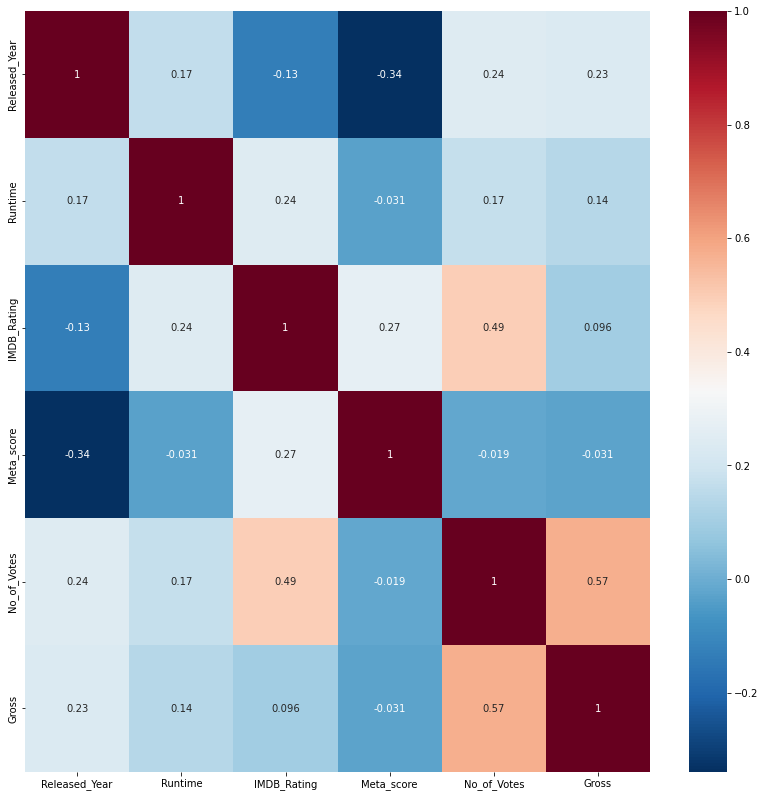

In [53]:
# And now the correlation matrix of the numerical variables
plt.figure(figsize=(14,14))
sns.heatmap(imdb.corr(), cmap='RdBu_r', annot=True)
plt.show()

In [ ]:
# conclusion
# The director who has earned the highest avarage gross is Anthony russo. he directed 4 series.
#Frank darahort are the most popular among viewers as the average rating for his series is the more
# Alfred Hitchcock is prodused 14 series he is most active director
#Christopher Nolan is the most popular active director in terms of Average Rating among people
# when runtime high then series will earn more revenue and rating
# The most popular Genre is Drama and the Genre combination of "comedy, Drama, romance" earns the highest Rating.
#Industry is growing with respect to number of series released and the total revenue gained year on year.
#From the correlation graph, it is the People  rate series in a similar manner.
#In general, movies with higher rating and metascore tend to earn more revenue.